In [2]:
# %pip install opendatasets

In [3]:
import pandas as pd
import opendatasets as od

In [4]:
## od.download("https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020")

In [5]:
races = pd.read_csv('f1-1950-2022/races.csv')

In [6]:
races.head(5)

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [7]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1079 non-null   int64 
 1   year         1079 non-null   int64 
 2   round        1079 non-null   int64 
 3   circuitId    1079 non-null   int64 
 4   name         1079 non-null   object
 5   date         1079 non-null   object
 6   time         1079 non-null   object
 7   url          1079 non-null   object
 8   fp1_date     1079 non-null   object
 9   fp1_time     1079 non-null   object
 10  fp2_date     1079 non-null   object
 11  fp2_time     1079 non-null   object
 12  fp3_date     1079 non-null   object
 13  fp3_time     1079 non-null   object
 14  quali_date   1079 non-null   object
 15  quali_time   1079 non-null   object
 16  sprint_date  1079 non-null   object
 17  sprint_time  1079 non-null   object
dtypes: int64(4), object(14)
memory usage: 151.9+ KB


In [8]:
#races['year'] = races.year.astype('int32')
races['year'] = pd.to_datetime(races.year, format='%Y').dt.strftime('%Y')
races['year'] = races.year.astype('int64')

In [9]:
races.year.dtypes

dtype('int64')

In [10]:
# remove unused columns

unused_columns = ['url','fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time']
races = races.drop(unused_columns, axis=1)

In [11]:
races.head(5)

,raceId,year,round,circuitId,name,date,time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00


In [12]:
#races['year'] = races.year.astype('str')
#races['year'] = races.year.str.strip()

In [13]:
races.shape

(1079, 7)

In [14]:
circuits = pd.read_csv('./f1-1950-2022/circuits.csv')
constructors = pd.read_csv('./f1-1950-2022/constructors.csv')
constructor_standings = pd.read_csv('./f1-1950-2022/constructor_standings.csv')
constructor_results = pd.read_csv('./f1-1950-2022/constructor_results.csv')
drivers = pd.read_csv('./f1-1950-2022/drivers.csv')
driver_standings = pd.read_csv('./f1-1950-2022/driver_standings.csv')
results = pd.read_csv('./f1-1950-2022/results.csv')
seasons = pd.read_csv('./f1-1950-2022/seasons.csv')
status = pd.read_csv('./f1-1950-2022/status.csv')
laps = pd.read_csv('./f1-1950-2022/lap_times.csv')

In [15]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [16]:
# check the number of rows and columns in driver standings df
driver_standings.shape

(33882, 7)

In [17]:
driver_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33882 entries, 0 to 33881
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  33882 non-null  int64  
 1   raceId             33882 non-null  int64  
 2   driverId           33882 non-null  int64  
 3   points             33882 non-null  float64
 4   position           33882 non-null  int64  
 5   positionText       33882 non-null  object 
 6   wins               33882 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


In [18]:
#check for the number of is null values in all columns

print(driver_standings.isnull().sum())

# check for duplicate records
sum(driver_standings.duplicated())

driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
positionText         0
wins                 0
dtype: int64


0

Convert inappropraite datatypes to more appropriate datatypes

In [19]:
columns = ['driverId', 'raceId', 'driverStandingsId']

for c in columns:
    driver_standings[c] = driver_standings[c].astype('str')

In [20]:
driver_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33882 entries, 0 to 33881
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  33882 non-null  object 
 1   raceId             33882 non-null  object 
 2   driverId           33882 non-null  object 
 3   points             33882 non-null  float64
 4   position           33882 non-null  int64  
 5   positionText       33882 non-null  object 
 6   wins               33882 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1.8+ MB


Since position is not very appropriate as an integer datatype and there is an alternative positionText column in string format, it makes sense to drop the 'position' column and rename the 'positionText' column to 'position'

In [21]:
# drop position column

driver_standings.drop('position', axis=1, inplace=True)

# rename positionText to position
driver_standings.rename(columns={'positionText': 'position'}, inplace=True)

In [22]:
# confirm changes in dataframe

driver_standings.columns.to_list()

['driverStandingsId', 'raceId', 'driverId', 'points', 'position', 'wins']

In [23]:
driver_standings = driver_standings.loc[:, ['driverStandingsId', 'raceId', 'driverId', 'position', 'wins', 'points']]

driver_standings.head()

,driverStandingsId,raceId,driverId,position,wins,points
0,1,18,1,1,1,10.0
1,2,18,2,2,0,8.0
2,3,18,3,3,0,6.0
3,4,18,4,4,0,5.0
4,5,18,5,5,0,4.0


In [24]:
#driver_standings.query('driverId == 1')
#driver_wins = driver_standings.apply(lambda x: True if x['position'] == 1 else False, axis=1)
#driver_wins

In [25]:
#len(driver_standings[(driver_standings['driverId'] == 830) & (driver_standings['position'] == 1)])

In [26]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [27]:
results.shape

(25840, 18)

In [28]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25840 non-null  int64  
 1   raceId           25840 non-null  int64  
 2   driverId         25840 non-null  int64  
 3   constructorId    25840 non-null  int64  
 4   number           25840 non-null  object 
 5   grid             25840 non-null  int64  
 6   position         25840 non-null  object 
 7   positionText     25840 non-null  object 
 8   positionOrder    25840 non-null  int64  
 9   points           25840 non-null  float64
 10  laps             25840 non-null  int64  
 11  time             25840 non-null  object 
 12  milliseconds     25840 non-null  object 
 13  fastestLap       25840 non-null  object 
 14  rank             25840 non-null  object 
 15  fastestLapTime   25840 non-null  object 
 16  fastestLapSpeed  25840 non-null  object 
 17  statusId    

In [29]:
# check for duplicated records in 'results' dataframe
print(sum(results.duplicated()))

# check for null values in each column
results.isna().sum()

0


resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

In [30]:
# remove rows with \N values from milliseconds column
#results = results[results['milliseconds'] != r"\N"]

results.replace(r"\N", "0",inplace=True)

In [31]:
#columns = ['resultId', 'raceId', 'driverId', 'constructorId']

#for c in columns:
#    results[c] = results[c].astype('str')

In [32]:
#%%time

#results[list(results.filter(regex='Id'))] = results[list(results.filter(regex='Id'))].astype('str')
#results['grid'] = results.grid.astype('str')

In [33]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25840 non-null  int64  
 1   raceId           25840 non-null  int64  
 2   driverId         25840 non-null  int64  
 3   constructorId    25840 non-null  int64  
 4   number           25840 non-null  object 
 5   grid             25840 non-null  int64  
 6   position         25840 non-null  object 
 7   positionText     25840 non-null  object 
 8   positionOrder    25840 non-null  int64  
 9   points           25840 non-null  float64
 10  laps             25840 non-null  int64  
 11  time             25840 non-null  object 
 12  milliseconds     25840 non-null  object 
 13  fastestLap       25840 non-null  object 
 14  rank             25840 non-null  object 
 15  fastestLapTime   25840 non-null  object 
 16  fastestLapSpeed  25840 non-null  object 
 17  statusId    

In [34]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [35]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou


In [36]:
#results[(results['grid'] == 1) & (results['positionOrder'] == 1)].groupby(['driverId']).count().sort_values(by='raceId', ascending=False)

In [37]:
laps = pd.read_csv('./f1-1950-2022/lap_times.csv')

In [38]:
laps.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [39]:
laps.shape

(538121, 6)

In [40]:
laps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538121 entries, 0 to 538120
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        538121 non-null  int64 
 1   driverId      538121 non-null  int64 
 2   lap           538121 non-null  int64 
 3   position      538121 non-null  int64 
 4   time          538121 non-null  object
 5   milliseconds  538121 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 24.6+ MB


In [41]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [42]:
drivers.shape

(855, 9)

In [43]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     855 non-null    int64 
 1   driverRef    855 non-null    object
 2   number       855 non-null    object
 3   code         855 non-null    object
 4   forename     855 non-null    object
 5   surname      855 non-null    object
 6   dob          855 non-null    object
 7   nationality  855 non-null    object
 8   url          855 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB


In [44]:
sum(drivers.duplicated())

0

Check for duplicated driver records

Change datatype to appropriate types

In [45]:
# change driverId to string datatype

drivers['driverId'] = drivers.driverId.astype('str')

In [46]:
# convert dob column from string to datetime

drivers['dob'] = pd.to_datetime(drivers['dob'])

Confirm datatype conversions have been made successfully

In [47]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   driverId     855 non-null    object        
 1   driverRef    855 non-null    object        
 2   number       855 non-null    object        
 3   code         855 non-null    object        
 4   forename     855 non-null    object        
 5   surname      855 non-null    object        
 6   dob          855 non-null    datetime64[ns]
 7   nationality  855 non-null    object        
 8   url          855 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 60.2+ KB


In [48]:
drivers.head(2)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld


Check for null values in all columns

In [49]:
drivers.isnull().sum()

driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64

Join the forename and surname into a single column

In [50]:
drivers['name'] = drivers.forename + ' ' + drivers.surname

##### Drop unused columns

In [51]:
unused_columns = ['number', 'forename', 'surname', 'url']

for c in unused_columns:
    drivers.drop(c, axis=1, inplace=True)

In [52]:
# change the order of columns in dataframe
drivers = drivers.iloc[:, [0, -1, 2, 3, 1, 4 ]]

drivers.head()

,driverId,name,code,dob,driverRef,nationality
0,1,Lewis Hamilton,HAM,1985-01-07,hamilton,British
1,2,Nick Heidfeld,HEI,1977-05-10,heidfeld,German
2,3,Nico Rosberg,ROS,1985-06-27,rosberg,German
3,4,Fernando Alonso,ALO,1981-07-29,alonso,Spanish
4,5,Heikki Kovalainen,KOV,1981-10-19,kovalainen,Finnish


Career wins of each driver

In [53]:
# Top 10 number of career races won 

races_won = results.query('positionOrder == 1').groupby(['driverId']).count().reset_index()
t10_races_won = races_won.loc[:10, ['driverId', 'raceId']].sort_values(by='raceId', ascending=False)
races_won = races_won.loc[:, ['driverId', 'raceId']].sort_values(by='raceId', ascending=False)
races_won['driverId'] = races_won['driverId'].astype('str')
races_won = pd.merge(races_won, drivers[['driverId', 'name']], how='left', on=['driverId'])
races_won

,driverId,raceId,name
0,1,103,Lewis Hamilton
1,30,91,Michael Schumacher
2,20,53,Sebastian Vettel
3,117,51,Alain Prost
4,102,41,Ayrton Senna
...,...,...,...
108,394,1,Giancarlo Baghetti
109,404,1,Innes Ireland
110,449,1,Rodger Ward
111,509,1,Jim Rathmann


Top 15 win rate of drivers with more than 10 career races

In [54]:
total_races = results.groupby('driverId')['raceId'].agg('count').reset_index()
total_races['driverId'] = total_races['driverId'].astype('str')
win_rate = pd.merge(races_won, total_races, on='driverId', how='inner')
win_rate.rename(columns={'raceId_x': 'wins', 'raceId_y': 'total_races'},inplace=True)
win_rate['win_rate'] = (win_rate['wins'] / win_rate['total_races']) * 100
win_rate.sort_values(by='win_rate', ascending=False, inplace=True)
win_rate['win_rate'] = win_rate['win_rate'].apply(lambda x: round(x, 2))
win_rate = win_rate.query('total_races > 10')#.iloc[:15]
win_rate['driverId'] = win_rate['driverId'].astype('str')
win_rate = pd.merge(win_rate, drivers[['name', 'driverId']], on=['driverId'], how='left')
win_rate

,driverId,wins,name_x,total_races,win_rate,name_y
0,579,24,Juan Fangio,58,41.38,Juan Fangio
1,647,13,Alberto Ascari,36,36.11,Alberto Ascari
2,373,25,Jim Clark,73,34.25,Jim Clark
3,1,103,Lewis Hamilton,310,33.23,Lewis Hamilton
4,30,91,Michael Schumacher,308,29.55,Michael Schumacher
...,...,...,...,...,...,...
99,200,1,Jochen Mass,114,0.88,Jochen Mass
100,44,1,Olivier Panis,158,0.63,Olivier Panis
101,832,1,Carlos Sainz,163,0.61,Carlos Sainz
102,55,1,Jean Alesi,202,0.50,Jean Alesi


 Highest Number of Fastest Laps by car constructor

In [55]:
fastest_laps = laps.groupby('raceId')['milliseconds'].min().reset_index().merge(laps[['raceId', 'milliseconds', 'driverId']])
fastest_laps = pd.merge(fastest_laps, results[['raceId', 'driverId','constructorId']], on=['raceId', 'driverId'], how='inner')
fastest_laps = fastest_laps.groupby('constructorId')['raceId'].agg('count').reset_index().sort_values(by='raceId', ascending=False)
fastest_laps = pd.merge(fastest_laps, constructors[['constructorId', 'name']], on='constructorId', how='left')
fastest_laps = fastest_laps.iloc[:, [2,1]]
fastest_laps.rename(columns={'name': 'car','raceId':'no_fastest_laps'}, inplace=True)
fastest_laps

,car,no_fastest_laps
0,Ferrari,137
1,McLaren,93
2,Mercedes,89
3,Red Bull,86
4,Williams,44
5,Renault,15
6,Benetton,6
7,Force India,5
8,Lotus F1,4
9,Brawn,4


Number of Fastest Laps in career by each driver

In [56]:
# extract how many times each driver have had the fastest lap in their career

no_fastest_laps = laps.groupby('raceId')['milliseconds'].min().reset_index().merge(laps)
no_fastest_laps = no_fastest_laps.groupby('driverId').count().sort_values(by='lap', ascending=False).reset_index()
no_fastest_laps['driverId']= no_fastest_laps['driverId'].astype('str')
no_fastest_laps = no_fastest_laps.merge(drivers, on='driverId')
no_fastest_laps.drop(no_fastest_laps.columns[[1, 2, 4, 5, 7]], axis=1, inplace=True)
no_fastest_laps = no_fastest_laps.iloc[:, [2, 1, 0, 3, 4, 5]]

In [57]:
no_fastest_laps

,name,lap,driverId,dob,driverRef,nationality
0,Lewis Hamilton,60,1,1985-01-07,hamilton,British
1,Michael Schumacher,54,30,1969-01-03,michael_schumacher,German
2,Kimi Räikkönen,45,8,1979-10-17,raikkonen,Finnish
3,Sebastian Vettel,38,20,1987-07-03,vettel,German
4,Mika Häkkinen,25,57,1968-09-28,hakkinen,Finnish
5,Fernando Alonso,23,4,1981-07-29,alonso,Spanish
6,Max Verstappen,23,830,1997-09-30,max_verstappen,Dutch
7,Nico Rosberg,20,3,1985-06-27,rosberg,German
8,Valtteri Bottas,19,822,1989-08-28,bottas,Finnish
9,Mark Webber,19,17,1976-08-27,webber,Australian


How many times has a driver finished better than their starting grid?

In [58]:
# check how much drivers have finished in better positions than grid position

drv_grid = results.groupby(['driverId', 'raceId'])['positionOrder'].min().reset_index()
drv_grid = drv_grid.merge(results)
drv_grid = drv_grid.iloc[:, [0, 1, 2, 6]]
drv_grid = drv_grid[drv_grid.apply(lambda x: True if x['grid'] > x['positionOrder'] else False, axis=1)]
drv_grid = drv_grid.groupby(['driverId']).count().sort_values(by='grid', ascending=False).reset_index()
drv_grid

,driverId,raceId,positionOrder,grid
0,4,192,192,192
1,18,166,166,166
2,8,165,165,165
3,30,141,141,141
4,22,135,135,135
...,...,...,...,...
705,696,1,1,1
706,480,1,1,1
707,699,1,1,1
708,700,1,1,1


In [59]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   driverId     855 non-null    object        
 1   name         855 non-null    object        
 2   code         855 non-null    object        
 3   dob          855 non-null    datetime64[ns]
 4   driverRef    855 non-null    object        
 5   nationality  855 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 40.2+ KB


In [60]:
# convert 'driverId' column in drv_grid from int to string

drv_grid['driverId'] = drv_grid['driverId'].astype('str')

# merge 'drv_grid' with 'drivers' to add name and code columns from 'drivers'
drv_grid = pd.merge(drv_grid, drivers[['driverId','name', 'code']], on='driverId', how='left')
drv_grid

,driverId,raceId,positionOrder,grid,name,code
0,4,192,192,192,Fernando Alonso,ALO
1,18,166,166,166,Jenson Button,BUT
2,8,165,165,165,Kimi Räikkönen,RAI
3,30,141,141,141,Michael Schumacher,MSC
4,22,135,135,135,Rubens Barrichello,BAR
...,...,...,...,...,...,...
705,696,1,1,1,John Barber,\N
706,480,1,1,1,Michael May,\N
707,699,1,1,1,Duke Nalon,\N
708,700,1,1,1,Carl Scarborough,\N


In [61]:
#drv_grid[drv_grid.apply(lambda x: True if x['grid'] < x['positionOrder'] else False, axis=1)].groupby(['driverId']).count()

How many career hatricks have each driver?

- Check which drivers have won the fastest lap in all F1 races

In [62]:
# extract the minimum time on a lap by race and driver
drv_fastLaps = laps.groupby(['raceId', 'driverId'])['milliseconds'].min().reset_index()

# merge drv_fastLaps with laps dataframe to join driverId, lap, position, and time columns
drv_fastLaps = pd.merge(drv_fastLaps, laps, how='left', left_on=['raceId', 'milliseconds'], right_on=['raceId', 'milliseconds'])

# get drivers with fastest laps in each race
drv_fastLaps = drv_fastLaps.groupby('raceId')['milliseconds'].min().reset_index()
drv_fastLaps = pd.merge(drv_fastLaps, laps[['raceId', 'milliseconds', 'driverId']], how='left', on=['raceId', 'milliseconds'])
drv_fastLaps

,raceId,milliseconds,driverId
0,1,87706,3
1,2,96641,18
2,3,112592,22
3,4,94556,15
4,5,82762,22
...,...,...,...
493,1092,104411,855
494,1093,98788,847
495,1094,80153,847
496,1095,73785,847


- Fetch the Champion of each race

In [63]:
# convert milliseconds column to string datatype

results['milliSeconds'] = results['milliseconds'].astype('int')
finish_results = results.query('milliSeconds != 0')
finish_results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,milliSeconds
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,5690616
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,5696094
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,5698779
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,5707797
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,5708630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25826,25832,1096,839,214,31,8,7,7,7,6.0,58,+57.240,5323154,45,5,1:29.333,212.817,1,5323154
25827,25833,1096,840,117,18,14,8,8,8,4.0,58,+1:16.931,5342845,42,9,1:29.620,212.135,1,5342845
25828,25834,1096,817,1,3,13,9,9,9,2.0,58,+1:23.268,5349182,45,18,1:30.785,209.413,1,5349182
25829,25835,1096,20,117,5,9,10,10,10,1.0,58,+1:23.898,5349812,35,15,1:30.312,210.510,1,5349812


In [64]:
# remove rows with '\N' as milliseconds value
#filtered_results = results.query('milliseconds != r"\\N"')

# retrieve race winners
race_champs = finish_results.groupby(['raceId'], as_index=False)['milliseconds'].min()
race_champs = pd.merge(race_champs, finish_results[['raceId', 'milliseconds', 'driverId', 'grid', 'positionOrder']], how='left', on=['raceId', 'milliseconds'])
race_champs

,raceId,milliseconds,driverId,grid,positionOrder
0,1,5655784,18,1,1
1,2,4252092,18,1,1
2,3,7063485,20,1,1
3,4,5508182,18,4,1
4,5,5839202,18,1,1
...,...,...,...,...,...
1077,1092,10904004,830,1,1
1078,1093,6131687,830,2,1
1079,1094,5916729,830,1,1
1080,1095,5914044,847,1,1


In [65]:
race_points = results.groupby(['driverId', 'raceId'], as_index=False)['points'].sum()
race_points = pd.merge(race_points, races[['raceId', 'year']], on='raceId', how='left')
race_points = race_points.groupby(['year', 'driverId'], as_index=False)['points'].sum()
race_points['driverId'] = race_points['driverId'].astype(str)
idx = race_points.groupby(['year'])['points'].transform(max) == race_points['points']

year_champs = pd.merge(race_points[idx], drivers[['driverId', 'name']], on='driverId', how='inner')
year_champs#.query('driverId == "1"')

,year,driverId,points,name
0,1950,642,30.00,Nino Farina
1,1951,579,37.00,Juan Fangio
2,1954,579,57.14,Juan Fangio
3,1955,579,41.00,Juan Fangio
4,1956,579,34.50,Juan Fangio
...,...,...,...,...
68,2012,20,281.00,Sebastian Vettel
69,2013,20,397.00,Sebastian Vettel
70,2016,3,385.00,Nico Rosberg
71,2021,830,388.50,Max Verstappen


Drivers, Constructors they drove for and number of races for each constructor

In [66]:
driver_const = results.groupby(['driverId', 'constructorId'], as_index=False)['raceId'].count()
driver_const['driverId'] = driver_const['driverId'].astype(str)
driver_const.query('driverId == "117"')

,driverId,constructorId,raceId
361,117,1,109
362,117,3,16
363,117,4,46
364,117,6,31


Number of Championship won by each Constructor

In [139]:
# extract Points by constructorId, Year and driverId
const_points = results.groupby(['driverId', 'raceId', 'constructorId'], as_index=False)['points'].max()
const_points = pd.merge(const_points, races[['year', 'raceId']], on='raceId', how='left')
const_drv_points = const_points.groupby(['year', 'driverId', 'constructorId'], as_index=False)['points'].sum()

# get rows where max points per year is equal to the points by constructorId, Year and driverId
idx = const_drv_points.groupby(['year'])['points'].transform(max) == const_drv_points['points']
const_champs = pd.merge(const_drv_points[idx], constructors[['constructorId', 'name']], on='constructorId')
const_champs.query('constructorId == 131')

,year,driverId,constructorId,points,name
16,1954,579,131,40.14,Mercedes
17,1955,579,131,41.00,Mercedes
18,2014,1,131,384.00,Mercedes
19,2015,1,131,381.00,Mercedes
20,2016,3,131,385.00,Mercedes
21,2017,1,131,363.00,Mercedes
22,2018,1,131,408.00,Mercedes
23,2019,1,131,413.00,Mercedes
24,2020,1,131,347.00,Mercedes


- Merge the race_champs with drv_fastLaps and extract rows with common raceId and driverId values

In [68]:
# merge drv_fastLaps df with race_champs df and filter by winners who begin in pole position (i.e. grid 1)
race_hatricks = pd.merge(drv_fastLaps, race_champs, how='inner', on=['raceId', 'driverId']).query('grid == 1')

# convert driverId in race_hatricks from int to str
race_hatricks['driverId'] = race_hatricks['driverId'].astype('str')

# get names of drivers by merging drivers dataframe
race_hatricks = pd.merge(race_hatricks, drivers[['driverId', 'name']], how='left', on=['driverId'])

# count the number of career hatricks
career_hatricks = race_hatricks.groupby('name', as_index=False).count().loc[:, ['name', 'raceId']]
career_hatricks = career_hatricks.sort_values(by='raceId', ascending=False)
career_hatricks

,name,raceId
10,Lewis Hamilton,18
12,Michael Schumacher,17
16,Sebastian Vettel,8
11,Max Verstappen,6
3,Fernando Alonso,5
13,Mika Häkkinen,5
2,Felipe Massa,4
14,Nico Rosberg,3
0,Charles Leclerc,2
15,Rubens Barrichello,2


Which drivers had the highest number of hatricks for each year

In [69]:
race_hatricks_year = pd.merge(race_hatricks, races[['raceId', 'year']], on=['raceId'], how='left')
race_hatricks_year = race_hatricks_year.groupby(['year', 'name'], as_index=False)['raceId'].count()
race_hatricks_year

# get records with number of hatricks equal to the highest number of hatricks in each year

idx = race_hatricks_year.groupby(['year'])['raceId'].transform(max) == race_hatricks_year['raceId']
max_race_hatricks_year = race_hatricks_year[idx]
max_race_hatricks_year

,year,name,raceId
0,1996,Damon Hill,2
2,1997,Jacques Villeneuve,2
4,1998,Mika Häkkinen,4
5,1999,Mika Häkkinen,1
6,2001,Michael Schumacher,2
7,2002,Michael Schumacher,4
9,2003,Michael Schumacher,3
11,2004,Michael Schumacher,5
14,2006,Michael Schumacher,2
15,2007,Felipe Massa,2


Wins by year for each F1 driver

In [71]:
# extract year and races 

race_years = races.groupby(['year', 'raceId'])['round'].min().reset_index()

# merge required columns from results df with race_years
results_years = pd.merge(race_years, results[['raceId', 'driverId', 'grid', 'positionOrder', 'positionText','points', 'constructorId']])

In [72]:
# extract driverId of the winners of each race

wins_by_year = results_years.query('positionOrder == 1').groupby(['year', 'driverId'], as_index=False)['raceId'].agg('count')
wins_by_year['driverId'] = wins_by_year['driverId'].astype('str')
wins_by_year = pd.merge(wins_by_year, drivers[['driverId', 'name']], on=['driverId'], how='left')
wins_by_year

,year,driverId,raceId,name
0,1950,579,3,Juan Fangio
1,1950,593,1,Johnnie Parsons
2,1950,642,3,Nino Farina
3,1951,498,1,José Froilán González
4,1951,579,3,Juan Fangio
...,...,...,...,...
388,2022,815,2,Sergio Pérez
389,2022,830,15,Max Verstappen
390,2022,832,1,Carlos Sainz
391,2022,844,3,Charles Leclerc


Number of Wins by Constructor

In [73]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25840 non-null  int64  
 1   raceId           25840 non-null  int64  
 2   driverId         25840 non-null  int64  
 3   constructorId    25840 non-null  int64  
 4   number           25840 non-null  object 
 5   grid             25840 non-null  int64  
 6   position         25840 non-null  object 
 7   positionText     25840 non-null  object 
 8   positionOrder    25840 non-null  int64  
 9   points           25840 non-null  float64
 10  laps             25840 non-null  int64  
 11  time             25840 non-null  object 
 12  milliseconds     25840 non-null  object 
 13  fastestLap       25840 non-null  object 
 14  rank             25840 non-null  object 
 15  fastestLapTime   25840 non-null  object 
 16  fastestLapSpeed  25840 non-null  object 
 17  statusId    

In [74]:
const_wins_by_year = results_years.query('positionOrder == 1').groupby(['constructorId'], as_index=False)['raceId'].agg('count')
const_wins_by_year

,constructorId,raceId
0,1,179
1,2,1
2,3,114
3,4,35
4,5,1
5,6,243
6,9,92
7,11,3
8,17,4
9,22,27


Number of career poles and poles won by year

In [75]:
# number of career poles

poles = results_years[(results_years['grid'] == 1)]
poles_by_year = poles.groupby(['year', 'driverId'])['raceId'].agg('count').reset_index()

poles_by_year

,year,driverId,raceId
0,1950,579,4
1,1950,642,2
2,1950,654,1
3,1951,498,1
4,1951,579,4
...,...,...,...
356,2022,815,1
357,2022,830,7
358,2022,832,3
359,2022,844,9


In [76]:
# number of career poles won

poles_won = results_years[(results_years['grid'] == 1) & (results_years['positionOrder'] == 1)]
poles_won_by_year = poles_won.groupby(['year', 'driverId'])['raceId'].agg('count').reset_index()

# merge poles_won_by_year and poles_by_year
poles_won_by_year = poles_by_year.merge(poles_won_by_year, how='outer', on=['year', 'driverId']).fillna(0)

# convert float datatype in pole_won column to int
poles_won_by_year['raceId_y'] = poles_won_by_year['raceId_y'].astype(int)

# changes custom column names to appropriate names
poles_won_by_year.rename(columns={'raceId_x': 'poles', 'raceId_y': 'pole_won'}, inplace=True)
poles_won_by_year['driverId'] = poles_won_by_year['driverId'].astype('str')
poles_won_by_year = pd.merge(poles_won_by_year, drivers[['driverId', 'name']], on=['driverId'], how='left')
poles_won_by_year

,year,driverId,poles,pole_won,name
0,1950,579,4,2,Juan Fangio
1,1950,642,2,1,Nino Farina
2,1950,654,1,0,Walt Faulkner
3,1951,498,1,1,José Froilán González
4,1951,579,4,1,Juan Fangio
...,...,...,...,...,...
356,2022,815,1,0,Sergio Pérez
357,2022,830,7,6,Max Verstappen
358,2022,832,3,1,Carlos Sainz
359,2022,844,9,2,Charles Leclerc


In [77]:
# maximum poles won by year (2013 - 2022)

idx = poles_won_by_year.groupby(['year'])['pole_won'].transform(max) == poles_won_by_year['pole_won']
max_poles_won_by_year = poles_won_by_year[idx]
max_poles_won_by_year

,year,driverId,poles,pole_won,name
0,1950,579,4,2,Juan Fangio
3,1951,498,1,1,José Froilán González
4,1951,579,4,1,Juan Fangio
5,1951,647,2,1,Alberto Ascari
11,1952,647,5,5,Alberto Ascari
...,...,...,...,...,...
337,2018,1,11,7,Lewis Hamilton
342,2019,1,5,3,Lewis Hamilton
347,2020,1,10,8,Lewis Hamilton
353,2021,830,10,7,Max Verstappen


Career Poles by Driver and Constructor

In [78]:
# poles by driver by constructor

poles_drv_const = poles.groupby(['year','driverId', 'constructorId'])['raceId'].agg('count').reset_index()
poles_drv_const = poles_drv_const.merge(constructors[['name', 'constructorId']], how='left', on='constructorId')
poles_drv_const

,year,driverId,constructorId,raceId,name
0,1950,579,51,4,Alfa Romeo
1,1950,642,51,2,Alfa Romeo
2,1950,654,113,1,Kurtis Kraft
3,1951,498,6,1,Ferrari
4,1951,579,51,4,Alfa Romeo
...,...,...,...,...,...
361,2022,815,9,1,Red Bull
362,2022,830,9,7,Red Bull
363,2022,832,6,3,Ferrari
364,2022,844,6,9,Ferrari


Number of Poles by Constructor

In [79]:
const_poles = poles_drv_const.groupby(['constructorId'], as_index=False)['raceId'].sum()

In [80]:
# number of career podiums

career_podiums = results[(results['positionOrder'] <= 3)].groupby(['driverId'])['raceId'].agg('count').reset_index()
career_podiums = career_podiums.sort_values(by='raceId', ascending=False)
career_podiums['driverId'] = career_podiums['driverId'].astype('str')
career_podiums = pd.merge(career_podiums, drivers[['driverId', 'name']], on=['driverId'], how='left')
career_podiums


,driverId,raceId,name
0,1,191,Lewis Hamilton
1,30,155,Michael Schumacher
2,20,122,Sebastian Vettel
3,117,106,Alain Prost
4,8,103,Kimi Räikkönen
...,...,...,...
210,320,1,Peter Gethin
211,340,1,John Love
212,347,1,Jo Bonnier
213,559,1,Pat Flaherty


In [81]:
# number of career podiums by year

podiums = results_years[(results_years['positionOrder'] <= 3)]
podium_years = podiums.groupby(['year', 'driverId'])['raceId'].agg('count').reset_index()

podium_years['driverId'] = podium_years['driverId'].astype('str')
podium_years = podium_years.merge(drivers[['driverId', 'name']], how='left', on='driverId')
podium_years = podium_years.iloc[:, [0,3,1,2]]
podium_years

,year,name,driverId,raceId
0,1950,Juan Fangio,579,3
1,1950,Louis Chiron,589,1
2,1950,Johnnie Parsons,593,1
3,1950,Louis Rosier,627,2
4,1950,Nino Farina,642,3
...,...,...,...,...
830,2022,Max Verstappen,830,17
831,2022,Carlos Sainz,832,9
832,2022,Charles Leclerc,844,11
833,2022,Lando Norris,846,1


Number of Total podiums by constructors

In [82]:
# extract only podiums 
const_podiums = results[(results['positionOrder'] <= 3)]
const_podiums = const_podiums.groupby(['constructorId'])['raceId'].agg('count').reset_index()

# merge with constructors to include name of constructors
const_podiums = const_podiums.merge(constructors[['constructorId', 'name']], how='left', on='constructorId')

# rename 'raceId' to 'podiums'
const_podiums.rename(columns={'raceId': 'podiums'}, inplace=True)
const_podiums = const_podiums.loc[:10, ['name', 'podiums']].sort_values(by='podiums', ascending=False)

const_podiums

,name,podiums
5,Ferrari,810
0,McLaren,478
2,Williams,314
7,Red Bull,234
3,Renault,103
1,BMW Sauber,17
6,Toyota,13
10,Sauber,10
9,Honda,9
8,Force India,6


Yearly points won by driver

In [83]:
year_points = results_years.groupby(['year', 'driverId'])['points'].agg('sum').reset_index()#.query('driverId == 1')

year_points['driverId'] = year_points['driverId'].astype('str')
year_points = year_points.merge(drivers[['driverId', 'name']], how='left', on='driverId')
year_points = year_points.iloc[:, [0,3,1,2]]
year_points

,year,name,driverId,points
0,1950,Maurice Trintignant,427,0.0
1,1950,José Froilán González,498,0.0
2,1950,Harry Schell,501,0.0
3,1950,Jim Rathmann,509,0.0
4,1950,Duane Carter,518,0.0
...,...,...,...,...
3160,2022,Nicholas Latifi,849,2.0
3161,2022,Yuki Tsunoda,852,12.0
3162,2022,Mick Schumacher,854,12.0
3163,2022,Guanyu Zhou,855,6.0


In [84]:
def save_to_csv(*dfs):
    for df in dfs:
        df_name = [x for x in globals() if globals()[x] is df][0]
        file_name = df_name + ".csv"
        df.to_csv(file_name, index=False)

In [85]:
#win_rate.to_csv(r'./f1-1950-2022/formula1/win_rate.csv', index=False)
#year_champs.to_csv(r'./f1-1950-2022/formula1/year_champs.csv', index=False)
#const_champs.to_csv(r'./f1-1950-2022/formula1/const_champs.csv', index=False)

In [86]:
#import os
#os.mkdir('./f1-1950-2022/formula1')

#dframes = [drivers, races, results, laps, constructors, constructor_results, constructor_standings, driver_standings,
#races_won, win_rate, fastest_laps, no_fastest_laps, drv_grid, career_hatricks, max_race_hatricks_year, 
#wins_by_year, poles_by_year, poles_won_by_year, max_poles_won_by_year, career_podiums, year_points, 
#const_podiums, podium_years]

#for df in dframes:
#    save_to_csv(df)


In [98]:
import matplotlib.pyplot as plt
import numpy as np

Top 10 Drivers with the Most World Championships

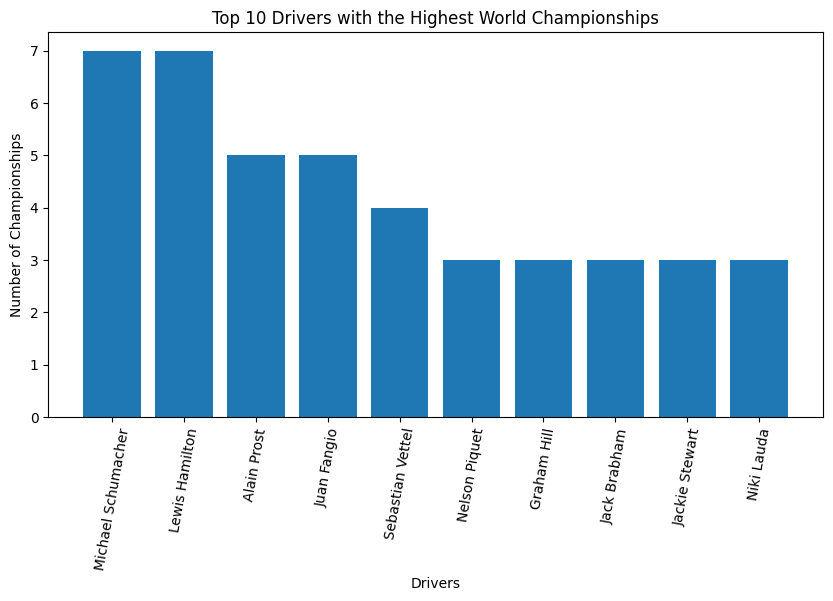

In [133]:
# Top 10 Drivers with the Most World Championships

world_champ = year_champs.groupby('name', as_index= False)['driverId'].count().sort_values('driverId', ascending= False)
plt.subplots(figsize=(10, 5))
plt.bar(world_champ.name[:10], world_champ.driverId[:10])
plt.title("Top 10 Drivers with the Highest World Championships")
plt.xticks(rotation = 80)
plt.xlabel('Drivers')
plt.ylabel('Number of Championships');

Which drivers have the most career hatricks ever?

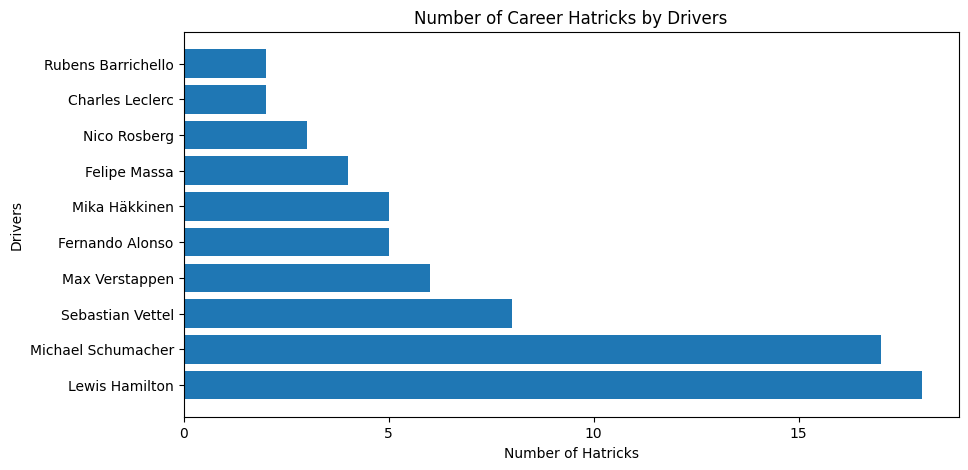

In [109]:
# career hatricks

plt.subplots(figsize=(10, 5))
plt.barh(career_hatricks.name[:10], career_hatricks.raceId[:10])
plt.title("Number of Career Hatricks by Drivers")
plt.xticks(np.arange(0, max(career_hatricks.raceId)+2, 5))
plt.xlabel("Number of Hatricks")
plt.ylabel("Drivers");

Which drivers have the most grand prix wins?

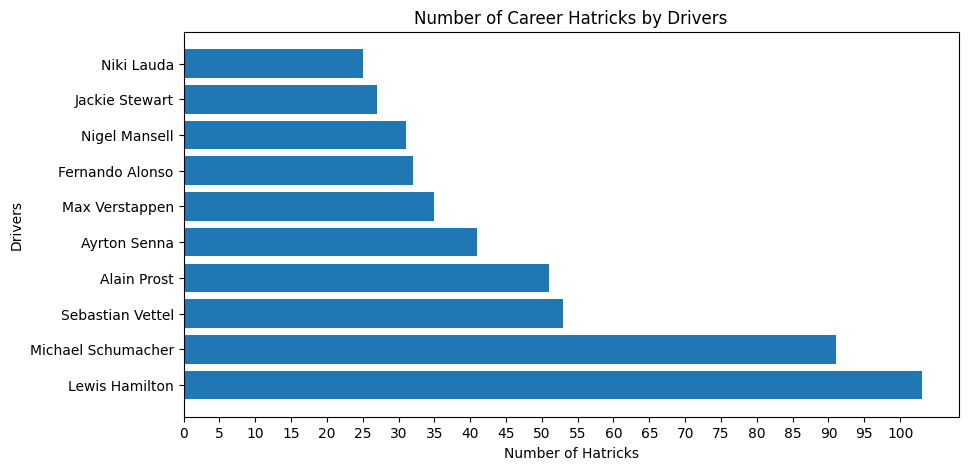

In [146]:
wins = wins_by_year.groupby('name', as_index= False)['raceId'].sum().sort_values('raceId', ascending= False)
plt.subplots(figsize=(10, 5))
plt.barh(wins.name[:10], wins.raceId[:10])
plt.title("Number of Career Hatricks by Drivers")
plt.xticks(np.arange(0, max(wins.raceId)+2, 5))
plt.xlabel("Number of Hatricks")
plt.ylabel("Drivers");

Top 10 Constructors with the Most Championships

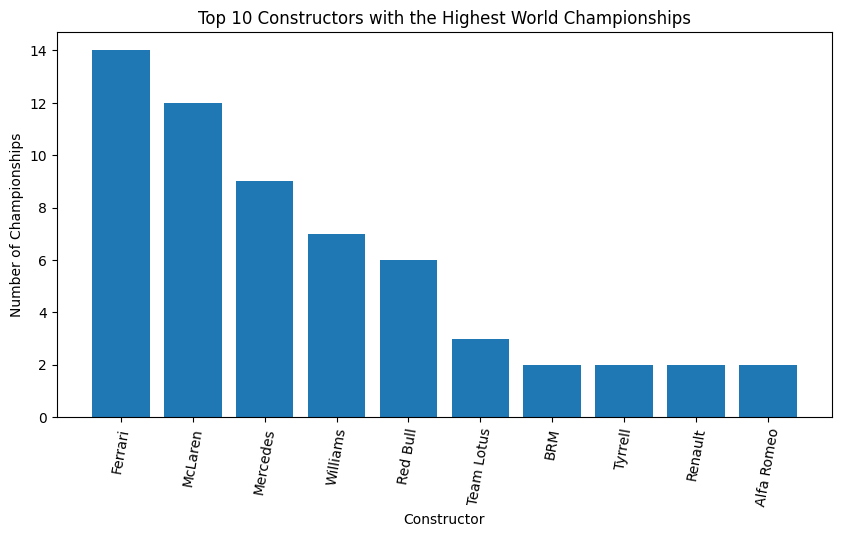

In [141]:
# Top 10 Constructors with the Most Championships

const_champ = const_champs.groupby('name', as_index= False)['constructorId'].count().sort_values('constructorId', ascending= False)
plt.subplots(figsize=(10, 5))
plt.bar(const_champ.name[:10], const_champ.constructorId[:10])
plt.title("Top 10 Constructors with the Highest World Championships")
plt.xticks(rotation = 80)
plt.xlabel('Constructor')
plt.ylabel('Number of Championships');

Which Constructors have the most number of podiums?

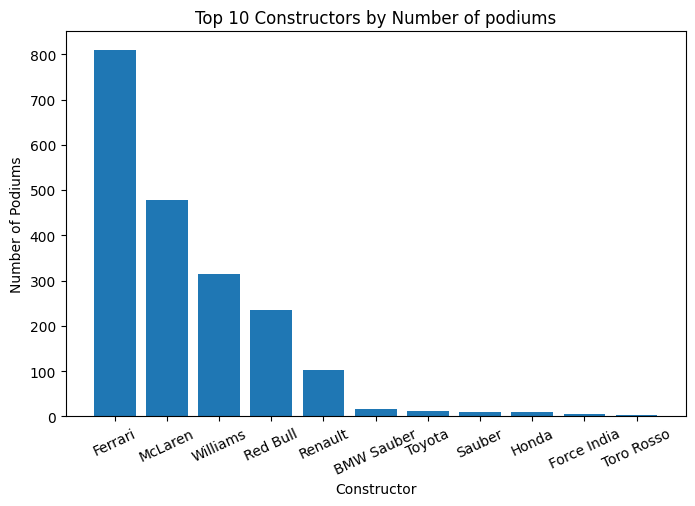

In [88]:
# Constructor Podiums

plt.subplots(figsize=(8, 5))
plt.bar(const_podiums.name, const_podiums.podiums)
plt.title("Top 10 Constructors by Number of podiums")
plt.xlabel("Constructor")
plt.ylabel("Number of Podiums")
plt.xticks(rotation=25);

Which drivers have the most number of podiums?

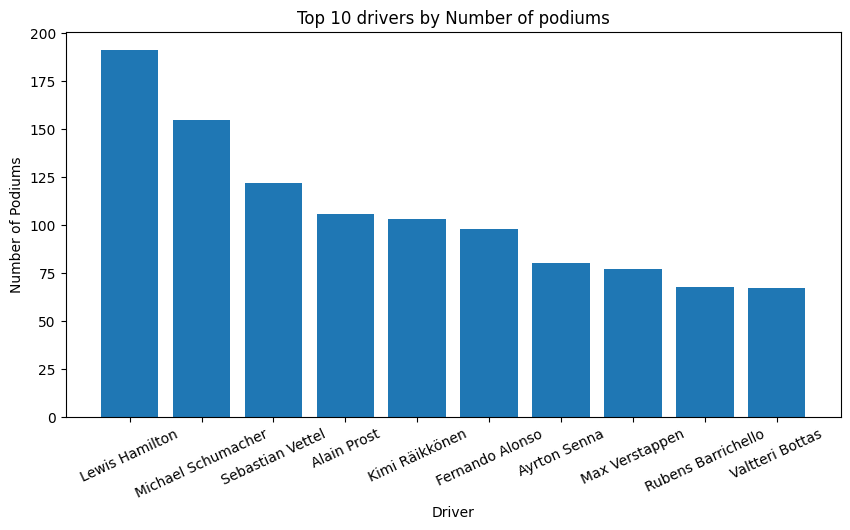

In [89]:
# Career Podiums

plt.subplots(figsize=(10, 5))
plt.bar(career_podiums.name[:10], career_podiums.raceId[:10]);
plt.title("Top 10 drivers by Number of podiums")
plt.xlabel("Driver")
plt.ylabel("Number of Podiums")
plt.xticks(rotation= 25);

Top 10 number of career wins by drivers

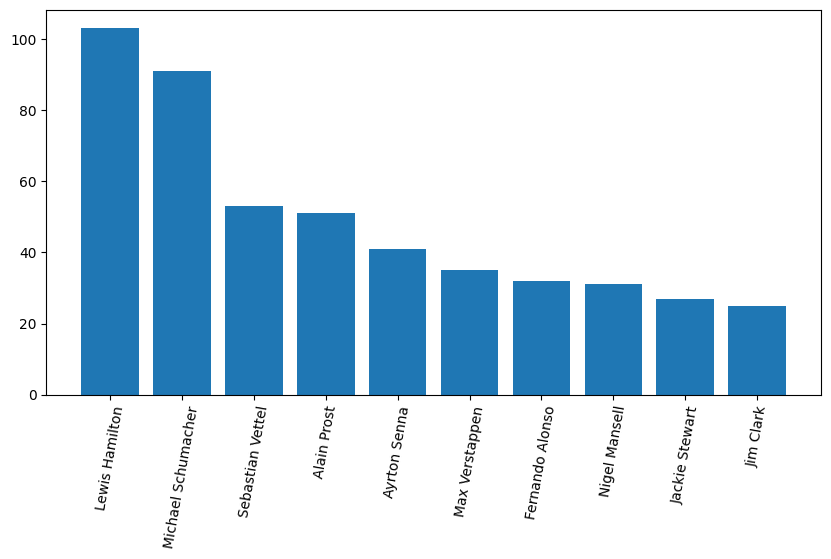

In [123]:
# Top 10 number of career wins

career_wins = wins_by_year.groupby('driverId', as_index=False)['raceId'].sum().sort_values('raceId', ascending=False)
career_wins = pd.merge(career_wins, drivers[['driverId', 'name']], on='driverId', how='left')
plt.subplots(figsize=(10, 5))
plt.bar(career_wins.name[:10], career_wins.raceId[:10])
plt.xticks(rotation = 80);